In [1]:
#使用pycharm运行测试，爬取了百大up主的UP昵称、会员等级、会员类别、关注、粉丝、获赞、播放

import selenium.webdriver as wb
import time
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import pandas as pd

def init_csv(filepath='test.csv'):
    headers = ['UP昵称', '会员等级', '会员类别', '关注', '粉丝', '获赞', '播放', '生日', '投稿']
    with open(filepath, 'w', newline='',encoding='utf-8')as f:
        f_csv = csv.writer(f)
        f_csv.writerow(headers)


def write_csv(filepath,datas):
    with open(filepath, 'a+', newline='',encoding='utf-8')as f:
        f_csv = csv.writer(f)
        f_csv.writerow(datas)

def read_uid(filepath):
    x = []
    with open(filepath, 'r', newline='', encoding='utf-8')as f:
        csv_read = csv.reader(f)
        for line in csv_read:
            line[0]=re.findall('\d+', line[0])[0]
            x.append(line[0])
    return x



class Spider(object):

    def __init__(self, display=True) -> None:
        super().__init__()
        option = wb.ChromeOptions()
        # 忽略driver自身的警告|错误等输出
        option.add_experimental_option(
            'excludeSwitches', ['enable-logging'])
        # 禁用图片加载,加速爬取url等页面数据,图片数据待爬取url后由requests库实现
        # option.add_experimental_option(
        #     'prefs', {"profile.managed_default_content_settings.images": 2})
        if display == False:
            option.headless = True
            print('程序运行，设置为无窗口模式')


#Chrome程序地址改这里  
        option.binary_location = r"C:\Program Files\Google\Chrome\Application\chrome.exe"
        # 浏览器驱动器初始化，需指明路径与参数
#Chrome驱动器地址改这里，改try里的那个就行
        try:
            self.driver = wb.Chrome(
                r"D:\Chromedriver\chromedriver.exe", options=option)
        except:
            self.driver = wb.Chrome(
                r"C:\Users\Ludy_Lab\Desktop\workspace\assets\chromedriver.exe", options=option)

    def login(self):
        self.driver.get('https://space.bilibili.com/'+'51896064')
        self.random_sleep(2)
        login_elm = self.driver.find_element_by_css_selector(
            '#internationalHeader > div > div > div.nav-user-center > div.user-con.logout > div:nth-child(1) > div > span > div > span')
        login_elm.click()
        wds = self.driver.window_handles
        self.driver.switch_to.window(wds[-1])
        self.random_sleep(2)
        username_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-username')
        password_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-passwd')
        login2_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#geetest-wrap > div > div.btn-box > a.btn.btn-login')



        #账号密码改这里
        username_elm.send_keys('XXXXXXX')
        password_elm.send_keys('XXXXXXX')
        self.random_sleep(1)
        login2_elm.click()
        # 8秒的时间进行人机结合登录=_=
        time.sleep(8)

    def random_sleep(self, delay=3):
        tmp = np.random.random()
        time.sleep(delay*(tmp+0.5))

    def fetch_by_UID(self, UID='51896064'):
        self.driver.get('https://space.bilibili.com/'+UID)
        self.random_sleep(3)

        up_name_elm = self.driver.find_element_by_css_selector('#h-name')
        print(up_name_elm.text)
        up_name = up_name_elm.text

        up_level_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-level.m-level')
        print(up_level_elm.get_attribute('lvl'))
        up_level = up_level_elm.get_attribute('lvl')

        up_member_elm = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-vipType')
        print(up_member_elm.text)
        up_member = up_member_elm.text

        up_follow_elm = self.driver.find_element_by_css_selector('#n-gz')
        print(up_follow_elm.text)
        up_follow = up_follow_elm.text

        up_followby_elm = self.driver.find_element_by_css_selector('#n-fs')
        print(up_followby_elm.text)
        up_followby = up_followby_elm.text

        up_getzan_elm = self.driver.find_element_by_css_selector('#n-bf')
        print(up_getzan_elm.text)
        up_getzan = up_getzan_elm.text

        up_numofplay_elm = self.driver.find_element_by_xpath(
            '/html/body/div[2]/div[2]/div/div[1]/div[3]/div[2]/p[2]')
        print(up_numofplay_elm.text)
        up_numofplay = up_numofplay_elm.text

        birthday = 'None'
        try:
            birthday = self.driver.find_element_by_css_selector(
                '#page-index > div.col-2 > div.section.user > div.info > div.content > div > div > div.item.birthday > span.text').text
        except:
            pass
        print(birthday)

        up_tougao_elm = self.driver.find_element_by_css_selector(
            '#navigator > div > div.n-inner.clearfix > div.n-tab-links > a.n-btn.n-video.n-audio.n-article.n-album > span.n-num').text
        tougao = up_tougao_elm
        xiangbu = 'Error'
        try:
            up_tougao_elm = self.driver.find_element_by_xpath(
                '//*[@id="navigator"]/div/div[1]/div[1]/a[3]/span[2]')
            up_tougao_elm.click()
            self.random_sleep(3)
            up_xiangbu_elm = self.driver.find_element_by_css_selector(
                '#page-video > div > div.contribution-sidenav > div > div > ul > li:nth-child(4) > span')
            xiangbu = up_xiangbu_elm.text
        except:
            pass
        if xiangbu != 'Error':
            tougao = str(int(tougao)-int(xiangbu))
        print(tougao)
        self.random_sleep(2)
        return (up_name, up_level, up_member, up_follow, up_followby, up_getzan, up_numofplay, birthday, tougao)



if __name__ == "__main__":
    #用来保存爬虫结果的文件是下面这个，可以不新建
    csv_path = r'.\bilibli_ups2.csv'
    #用来读取UID列表的csv文件是这个，excel要先另存为成csv，并且不要有标题行
    uid_path = r'.\UID100.csv'
    uid_list = read_uid(uid_path)
    worker = Spider(display=True)   
    try:
        worker.login()
    except:
        print('登录失败')
        time.sleep(10)
        exit()
    
    try:
        init_csv(csv_path)
    except:
        pass
    
    for i in range(len(uid_list)):
        try:
            write_csv(csv_path,worker.fetch_by_UID(uid_list[i]))
            print('*'*20+'\n',i,'success')
        except:
            print(i,'error')
    time.sleep(10)
    worker.random_sleep()

爱做饭的芋头SAMA
6

254
368.9万
1048.6万
1.6亿
09-25
121
********************
 0 success
啊吗粽
6
年度大会员
202
344.7万
2450.2万
2.6亿
05-28
200
********************
 1 success
79471674218_bili
0

3
0
0
0
None
0
********************
 2 success
波桑吃遍世界
6

117
139.6万
653.4万
1.1亿
07-30
159
********************
 3 success
宝剑嫂
6
年度大会员
377
335.5万
1864.2万
2亿
07-08
192
********************
 4 success
长歌与小见见
6
年度大会员
77
208.1万
1259.2万
5亿
07-07
5 error
-纯黑-
6
年度大会员
0
326.5万
654.2万
3.7亿
None
469
********************
 6 success
吃货请闭眼
6

68
177.1万
834.5万
2.2亿
None
360
********************
 7 success
吃货明3
6
年度大会员
142
132.3万
550万
2.8亿
None
829
********************
 8 success
潮汕好男人
6
年度大会员
165
160.8万
898.1万
1.9亿
None
171
********************
 9 success
嘟督不噶油
6
年度大会员
162
282.5万
1288.1万
2.8亿
None
342
********************
 10 success
逗川kshadow
6
年度大会员
56
169.6万
515.6万
1.7亿
08-23
249
********************
 11 success
东尼ookii
6
年度大会员
151
346.6万
2942.4万
3.3亿
None
173
********************
 12 success
电影最TOP
6

23
339.2万
783.5万
2.

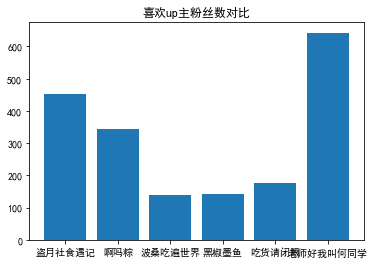

In [4]:
#绘制了粉丝量的条形图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
names = ('盗月社食遇记', '啊吗粽', '波桑吃遍世界', '黑椒墨鱼', '吃货请闭眼','老师好我叫何同学')
number = [452.7, 344.7, 139.6, 141.4, 177.1, 642.4]
 
plt.bar(names, number)
plt.title('喜欢up主粉丝数对比')
 
plt.show()